# Initialize

In [1]:
import numpy as np
import random
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from io import StringIO
class SEIRModel:
    def __init__(self, population, beta, sigma, gamma):
        self.population = population
        self.beta = beta
        self.sigma = sigma
        self.gamma = gamma
        self.s = 100 
        self.e = 10
        self.i = 0
        self.r = 0

    def step(self):
        new_infections = self.beta * self.s * self.i / self.population
        new_exposed = new_infections
        new_recovered = self.gamma * self.i
        self.s -= new_infections
        self.e += new_exposed
        self.i += new_infections - new_recovered
        self.r += new_recovered

    def get_infected(self):
        return int(self.i)

    def __call__(self, y, t, N, beta, sigma, gamma):
        S, E, I, R = y
        dSdt = -beta * S * I / N
        dEdt = beta * S * I / N - sigma * E
        dIdt = sigma * E - gamma * I
        dRdt = gamma * I
        return dSdt, dEdt, dIdt, dRdt
    
def load_df(data_name: str) -> pd.DataFrame:
    path = f"nb_datasets/{data_name}"

    df:pd.DataFrame = pd.read_csv(path)

    # ensure sort by date
    df['date'] = pd.to_datetime(df['date'], dayfirst=True, format='%d/%m/%Y')
    df_sorted: pd.DataFrame = df.sort_values(by='date')

    df_sorted = df.sort_values("barangay_Res")
    keep_cols = ["date", "barangay_Res", "count_Exposed", "count_Infectious", "count_Recovered"]
    main_df: pd.DataFrame = df_sorted[df_sorted.columns.intersection(keep_cols)]
    
    return main_df


In [2]:

# Input data as a string
data = """
Barangay	Population percentage (2020)	Population (2020)	Population (2015)	Change (2015‑2020)	Annual Population Growth Rate (2015‑2020)
Bagong Silang	1.76%	5,736	5,539	3.56%	0.74%
Calendola	1.16%	3,797	4,728	-19.69%	-4.51%
Chrysanthemum	3.81%	12,433	10,482	18.61%	3.66%
Cuyab	6.57%	21,422	21,731	-1.42%	-0.30%
Estrella	2.46%	8,025	7,478	7.31%	1.50%
Fatima	1.99%	6,491	8,704	-25.43%	-5.99%
G.S.I.S.	0.87%	2,828	2,867	-1.36%	-0.29%
Landayan	10.19%	33,235	31,407	5.82%	1.20%
Langgam	9.49%	30,946	29,625	4.46%	0.92%
Laram	2.00%	6,536	6,285	3.99%	0.83%
Magsaysay	3.92%	12,793	12,172	5.10%	1.05%
Maharlika	1.71%	5,580	6,343	-12.03%	-2.66%
Narra	0.70%	2,297	2,429	-5.43%	-1.17%
Nueva	1.31%	4,286	4,967	-13.71%	-3.06%
Pacita 1	6.93%	22,581	20,362	10.90%	2.20%
Pacita 2	3.68%	11,993	12,811	-6.39%	-1.38%
Poblacion	1.77%	5,771	5,890	-2.02%	-0.43%
Riverside	0.93%	3,028	3,226	-6.14%	-1.32%
Rosario	1.81%	5,911	5,613	5.31%	1.09%
Sampaguita Village	1.52%	4,941	5,733	-13.81%	-3.08%
San Antonio	18.21%	59,368	61,428	-3.35%	-0.72%
San Lorenzo Ruiz	1.78%	5,800	5,073	14.33%	2.86%
San Roque	2.20%	7,161	7,011	2.14%	0.45%
San Vicente	8.45%	27,561	26,129	5.48%	1.13%
Santo Nino	1.19%	3,892	4,172	-6.71%	-1.45%
United Bayanihan	1.65%	5,385	7,086	-24.01%	-5.61%
United Better Living	1.90%	6,204	6,518	-4.82%	-1.03%
"""

## Check if names are correct
# Create a DataFrame
df = pd.read_csv(StringIO(data), sep="\t")
df["Barangay"] = df["Barangay"].str.upper()

# Clean up the 'Population (2020)' column to remove commas and convert to integers
df["Population (2020)"] = df["Population (2020)"].str.replace(",", "").astype(int)

# Create a dictionary with Barangay as keys and Population (2020) as values
barangay_population_dict = df.set_index("Barangay")["Population (2020)"].to_dict()

# Print the dictionary
print(barangay_population_dict)


df = load_df("CITY_OF_SAN_PEDRO_processed.csv")

name_list = df["barangay_Res"].unique().tolist()

print(f"br_list = {len(barangay_population_dict)} \nbr_df = {len(name_list)}")

for b_name in barangay_population_dict:
    if b_name not in name_list:
        print(f"Wrong: {b_name}")
        

for brgy_name, brgy_pop in barangay_population_dict.items():
  print(f"{brgy_name}: {brgy_pop}")        

{'BAGONG SILANG': 5736, 'CALENDOLA': 3797, 'CHRYSANTHEMUM': 12433, 'CUYAB': 21422, 'ESTRELLA': 8025, 'FATIMA': 6491, 'G.S.I.S.': 2828, 'LANDAYAN': 33235, 'LANGGAM': 30946, 'LARAM': 6536, 'MAGSAYSAY': 12793, 'MAHARLIKA': 5580, 'NARRA': 2297, 'NUEVA': 4286, 'PACITA 1': 22581, 'PACITA 2': 11993, 'POBLACION': 5771, 'RIVERSIDE': 3028, 'ROSARIO': 5911, 'SAMPAGUITA VILLAGE': 4941, 'SAN ANTONIO': 59368, 'SAN LORENZO RUIZ': 5800, 'SAN ROQUE': 7161, 'SAN VICENTE': 27561, 'SANTO NINO': 3892, 'UNITED BAYANIHAN': 5385, 'UNITED BETTER LIVING': 6204}
br_list = 27 
br_df = 27
BAGONG SILANG: 5736
CALENDOLA: 3797
CHRYSANTHEMUM: 12433
CUYAB: 21422
ESTRELLA: 8025
FATIMA: 6491
G.S.I.S.: 2828
LANDAYAN: 33235
LANGGAM: 30946
LARAM: 6536
MAGSAYSAY: 12793
MAHARLIKA: 5580
NARRA: 2297
NUEVA: 4286
PACITA 1: 22581
PACITA 2: 11993
POBLACION: 5771
RIVERSIDE: 3028
ROSARIO: 5911
SAMPAGUITA VILLAGE: 4941
SAN ANTONIO: 59368
SAN LORENZO RUIZ: 5800
SAN ROQUE: 7161
SAN VICENTE: 27561
SANTO NINO: 3892
UNITED BAYANIHAN: 5385


# Sim Anneal Code

In [52]:
# Simulate SEIR model
def simulate_seir(beta, sigma, gamma, y0, t, n):
    N = n
    seir_model = SEIRModel(N, beta, sigma, gamma)
    
    # Solve ODEs for SEIR
    result = odeint(seir_model, y0, t, args=(N, beta, sigma, gamma))
    S, E, I, R = result.T
    
    return S, E, I, R
      

# # Objective function
# def objective_function(params, observed_data, initial_conditions, time_points, n):
#     beta, sigma, gamma = params

#     # Simulate the SEIR model with given parameters
#     s, predicted_E, predicted_I, predicted_R = simulate_seir(beta, sigma, gamma, initial_conditions, time_points, n)
    
#     # Split observed data into compartments
#     observed_E, observed_I, observed_R = observed_data[:, 0], observed_data[:, 1], observed_data[:, 2]
    
#     # Calculate metrics for each compartment
#     metrics = {}
#     mae_dict = {}
#     rmse_dict = {}
    
#     for compartment, observed, predicted in zip(
#         ["E", "I", "R"],
#         [observed_E, observed_I, observed_R],
#         [predicted_E, predicted_I, predicted_R]
#         ):
    
#         mae = mean_absolute_error(observed, predicted)
#         rmse = np.sqrt(mean_squared_error(observed, predicted))

#         # Normalize metrics
#         mae_normalized = mae / np.max(observed)  # Scale by max value
#         rmse_normalized = rmse / np.max(observed)  # Scale by max value

#         # Weighted average for each compartment
#         combined_metric = (0.5 * mae_normalized) + (0.5 * rmse_normalized)
#         metrics[compartment] = combined_metric
#         mae_dict[compartment] = mae
#         rmse_dict[compartment] = rmse

#     # Combine all compartments (average or weighted sum)
#     total_metric = np.mean(list(metrics.values()))  # Equal weight to all compartments
#     # for logging
#     total_mae = np.mean(list(mae_dict.values()))
#     total_rmse = np.mean(list(rmse_dict.values()))
    
#     return total_metric, total_mae, total_rmse

# Objective function
def objective_function(params, observed_data, initial_conditions, time_points, n):
    beta, sigma, gamma = params

    # Simulate the SEIR model with given parameters
    s, predicted_E, predicted_I, predicted_R = simulate_seir(beta, sigma, gamma, initial_conditions, time_points, n)
    
    # Split observed data into compartments (only I for Infectious)
    observed_I = observed_data[:, 1]  # Only infectious data
    predicted_I = predicted_I  # Predicted infectious data
    
    # Calculate metrics for Infectious compartment
    mae = mean_absolute_error(observed_I, predicted_I)
    rmse = np.sqrt(mean_squared_error(observed_I, predicted_I))

    # Normalize metrics
    mae_normalized = mae / np.max(observed_I)  # Scale by max value
    rmse_normalized = rmse / np.max(observed_I)  # Scale by max value

    # Weighted average for Infectious compartment
    combined_metric = (0.2 * mae_normalized) + (0.8 * rmse_normalized)

    # Combine metrics (since only Infectious is considered)
    total_metric = combined_metric
    # For logging purposes
    total_mae = mae
    total_rmse = rmse
    
    return rmse, total_mae, total_rmse

# Simulated Annealing for SEIR parameter tuning
def simulated_annealing_seir(observed_data, initial_conditions, time_points, temp, cooling_rate, max_iter, n):
    # Initial parameter guesses
    current_params = [0.5, 0.5, 0.5]  # Initial guesses for beta, sigma, gamma
    current_cost, current_mae, current_rmse = objective_function(current_params, observed_data, initial_conditions, time_points, n)
    best_params = current_params
    best_mae, best_rmse = current_mae, current_rmse
    best_cost = current_cost
    
    #min_temp = 1e-5 
    initial_temp = temp
    
    for i in range(max_iter):
        # Generate new candidate parameters
        new_params = [param + random.uniform(-0.05, 0.05) for param in current_params]
        new_params = np.clip(new_params, 0, 1)  # Keep parameters in a valid range (0 to 1)        
        # Evaluate the new candidate solution
        new_cost, new_mae, new_rmse = objective_function(new_params, observed_data, initial_conditions, time_points, n)

        # ADJUST BASED ON METRIC
        # Decide whether to accept the new solution
        if new_cost < current_cost or random.random() < np.exp((current_cost - new_cost) / temp):
            current_params = new_params
            current_cost = new_cost
            
            # Update the best solution found so far
            if new_cost < best_cost:
                best_params = new_params
                best_cost = new_cost
                best_mae, best_rmse = new_mae, new_rmse

        # Cool down the temperature
        #temp = max(temp * cooling_rate, min_temp)  # Exponential decrease
        #temp = temp - (initial_temp / max_iter)  # Linear decrease
        temp = initial_temp / (1 + cooling_rate * i)  # Logarithmic decrease

    return best_params, best_mae, best_rmse

# Run Sim Anneal

In [53]:
'''
- need every barangay name and population
- iterate through every barangay in san pedro
- store best params in dictionary
- show graphs of using optimized params for brgys
- show split for train and test

brgy_dict = { brgy_name: population } # done

params_dict = {
  "brgy1" : {
    "beta" : 0.217,
    "sigma" : 0.217,
    "gamma": 0.217
  },
  "brgy2" : {
    "beta" : 0.217,
    "sigma" : 0.217,
    "gamma": 0.217
  },
  "brgy3" : {
    "beta" : 0.217,
    "sigma" : 0.217,
    "gamma": 0.217
  }

'''

# function for running sim anneal
def run_anneal(brgy_pop, observed_data):
  # Initial parameters

  N = brgy_pop
  I0 = observed_data['count_Infectious'].iloc[0] # Initial infected from data
  E0 = observed_data['count_Exposed'].iloc[0] # Initial exposed cases
  R0 = observed_data['count_Recovered'].iloc[0] # Initial recovered
  S0 = N - I0 - E0 - R0  # Susceptible

  initial_conditions: tuple = [S0, E0, I0, R0]
    
  # Simulated Annealing parameters
  temp = 1500  
  cooling_rate = 0.99
  max_iter = 1500 
  time_points = np.arange(observed_data.shape[0]) # odeint expects an array (vector) of integers.
  
  observed_data = observed_data.to_numpy()
  
  best_params, best_mae, best_rmse = simulated_annealing_seir(observed_data, initial_conditions, time_points, temp, cooling_rate, max_iter, N)

  return best_params, best_mae, best_rmse

# store best params  
params_dict = dict()
mae_values = []
rmse_values = []

# load data
main_df: pd.DataFrame = load_df("CITY_OF_SAN_PEDRO_processed.csv")

# Split data into training and testing
train_data = main_df[(main_df['date'] >= '11/01/2021') & (main_df['date'] <= '04/01/2022')]
test_data = main_df[(main_df['date'] >= '04/02/2022') & (main_df['date'] <= '06/30/2022')]

for brgy_name, brgy_pop in barangay_population_dict.items():
  brgy_data = train_data[train_data["barangay_Res"] == brgy_name]
  
  if brgy_data.empty:
    print(f"Skipping {brgy_name}: No data available.")
    continue

  brgy_data = brgy_data.sort_values(by="date")
  observed_data = brgy_data[["count_Exposed", "count_Infectious", "count_Recovered"]]

  if observed_data.empty:
    print(f"Skipping {brgy_name}: Observed data is empty.")
    continue
  best_params, best_mae, best_rmse = run_anneal(brgy_pop, observed_data)
  o_beta, o_sigma, o_gamma = best_params
  
  mae_values.append(best_mae)
  rmse_values.append(best_rmse)
  
  brgy_params = {
      "beta": o_beta,
      "sigma": o_sigma,
      "gamma": o_gamma,
      "mae": best_mae, 
      "rmse": best_rmse
  }
  params_dict[brgy_name] = brgy_params


best_mae = min(mae_values)
worst_mae = max(mae_values)
average_mae = sum(mae_values) / len(mae_values)

best_rmse = min(rmse_values)
worst_rmse = max(rmse_values)
average_rmse = sum(rmse_values) / len(rmse_values)

print(f"Best MAE: {best_mae}")
print(f"Worst MAE: {worst_mae}")
print(f"Average MAE: {average_mae}\n")

print(f"Best RMSE: {best_rmse}")
print(f"Worst RMSE: {worst_rmse}")
print(f"Average RMSE: {average_rmse}")

Best MAE: 0.868421052631579
Worst MAE: 63.84064823063445
Average MAE: 11.736301882659923

Best RMSE: 1.332784974957958
Worst RMSE: 111.16250416511824
Average RMSE: 17.174716371985998


In [41]:
for brgy_name in params_dict.keys():
    print(f"{brgy_name:} \nbeta: {params_dict[brgy_name]["beta"]} \nsigma: {params_dict[brgy_name]["sigma"]} \ngamma: {params_dict[brgy_name]["gamma"]}")

BAGONG SILANG 
beta: 0.942907343125161 
sigma: 1.0 
gamma: 0.8685882592995514
CALENDOLA 
beta: 0.5 
sigma: 0.5 
gamma: 0.5
CHRYSANTHEMUM 
beta: 0.7951500419014347 
sigma: 0.8164466769756078 
gamma: 0.7008759241086916
CUYAB 
beta: 0.9551498557009763 
sigma: 0.8497174286177426 
gamma: 0.881437377962291
ESTRELLA 
beta: 0.9113295938434588 
sigma: 0.9347304840085063 
gamma: 0.8603649357633124
FATIMA 
beta: 0.37928997864801406 
sigma: 0.9488397300619058 
gamma: 0.3354733088180451
G.S.I.S. 
beta: 0.6549850713262318 
sigma: 0.4865408052893182 
gamma: 0.590354763769994
LANDAYAN 
beta: 0.9441084450019976 
sigma: 0.892885974645208 
gamma: 0.8530814235351525
LANGGAM 
beta: 0.6584754616631764 
sigma: 0.7526357153529182 
gamma: 0.6232504713711261
LARAM 
beta: 0.007735273683873861 
sigma: 0.5105057765936056 
gamma: 0.0
MAGSAYSAY 
beta: 0.5658106617229097 
sigma: 0.45934391790669055 
gamma: 0.5301466439448366
MAHARLIKA 
beta: 0.7854592767704892 
sigma: 0.49501099911975915 
gamma: 0.685820605956937
NAR

# Params for each barangay

beta: 1.0 
sigma: 0.810786117535842 
gamma: 0.862136319860779 
mae: 4.4897925902611675 
rmse: 6.404214025829832


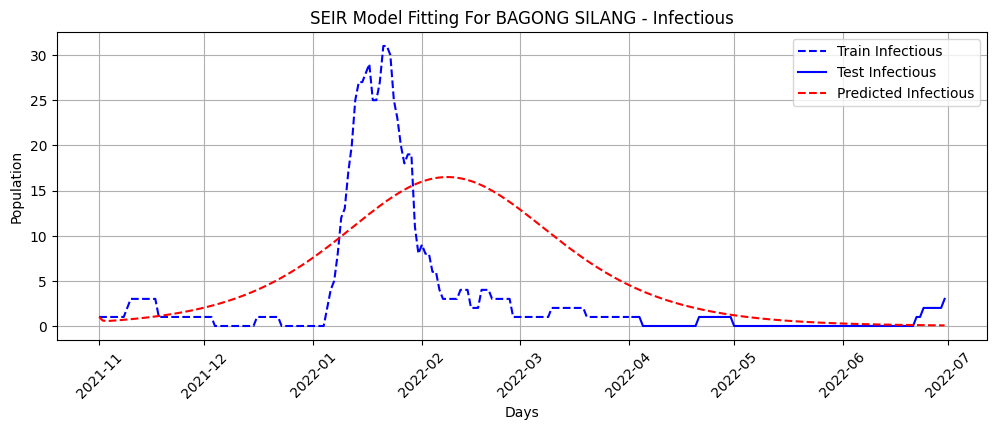

beta: 0.5 
sigma: 0.5 
gamma: 0.5 
mae: 3.9917355371900825 
rmse: 8.522696969643098


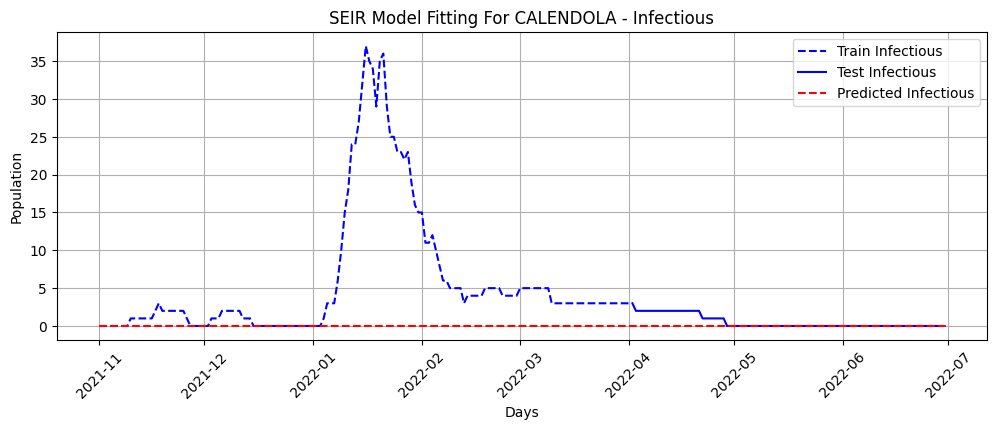

beta: 0.9952946704592824 
sigma: 0.5707207410935651 
gamma: 0.8485146464660794 
mae: 7.798790342423761 
rmse: 13.076982741530285


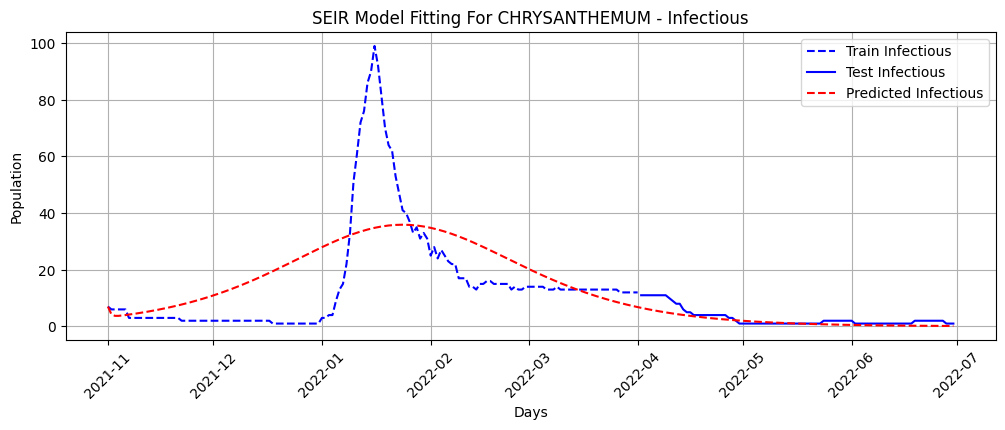

beta: 0.40851173012459263 
sigma: 0.9456811839447292 
gamma: 0.3800116829802317 
mae: 15.62910034648779 
rmse: 19.92853667077154


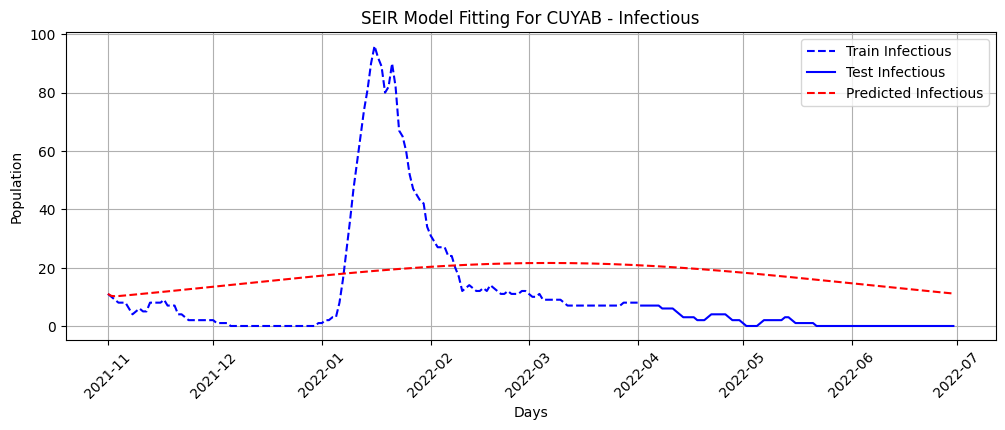

beta: 0.9954253752764403 
sigma: 0.9977348643518492 
gamma: 0.9336843658808202 
mae: 2.2753220192488617 
rmse: 3.8682002409627225


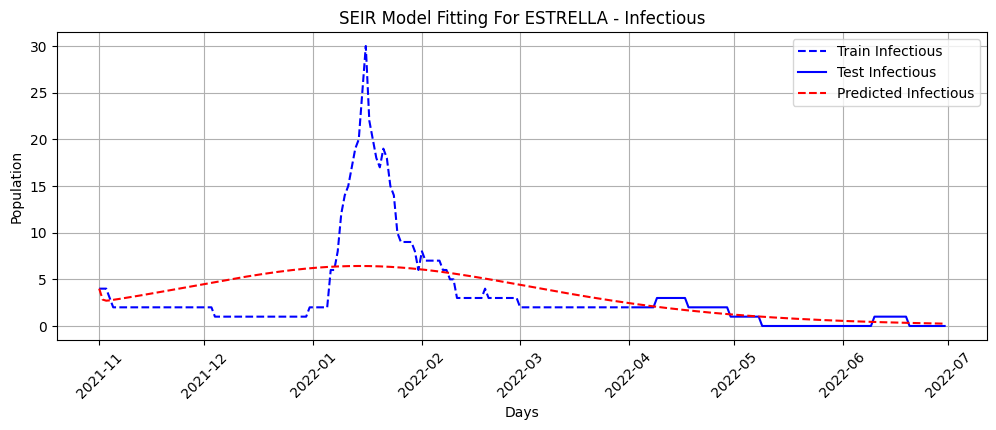

beta: 0.9921725026197273 
sigma: 0.6934288793037061 
gamma: 0.7693460127243749 
mae: 6.836407299620978 
rmse: 11.478480138611278


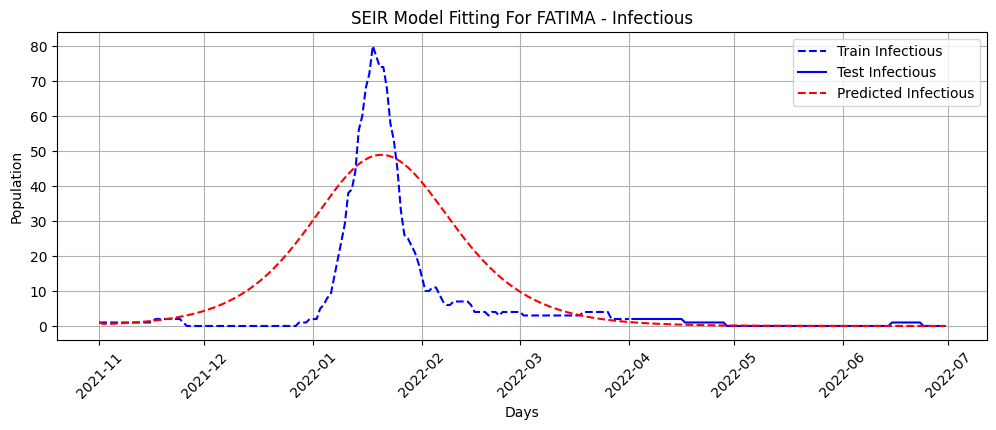

beta: 0.9962404692331251 
sigma: 0.46415852957106374 
gamma: 0.8644723891396022 
mae: 1.7577970060094925 
rmse: 2.8391294759460424


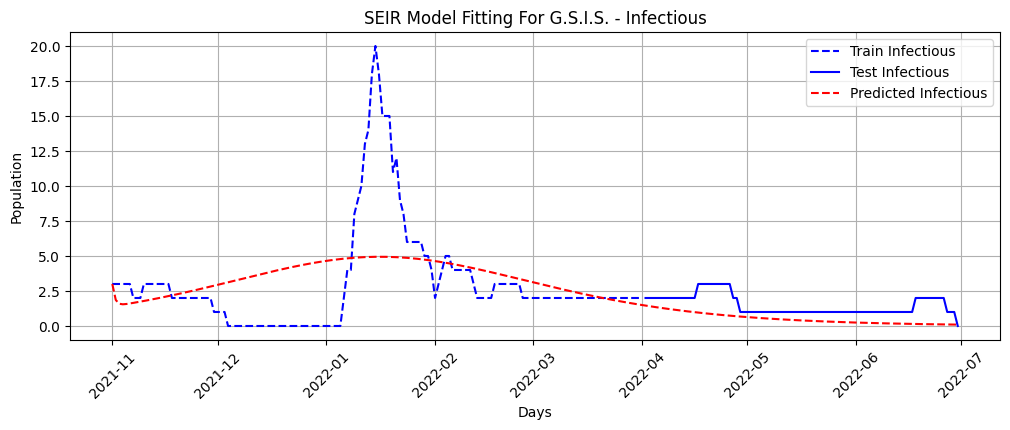

beta: 0.6179469391445336 
sigma: 1.0 
gamma: 0.558697024465729 
mae: 21.835295360001453 
rmse: 27.279554191713373


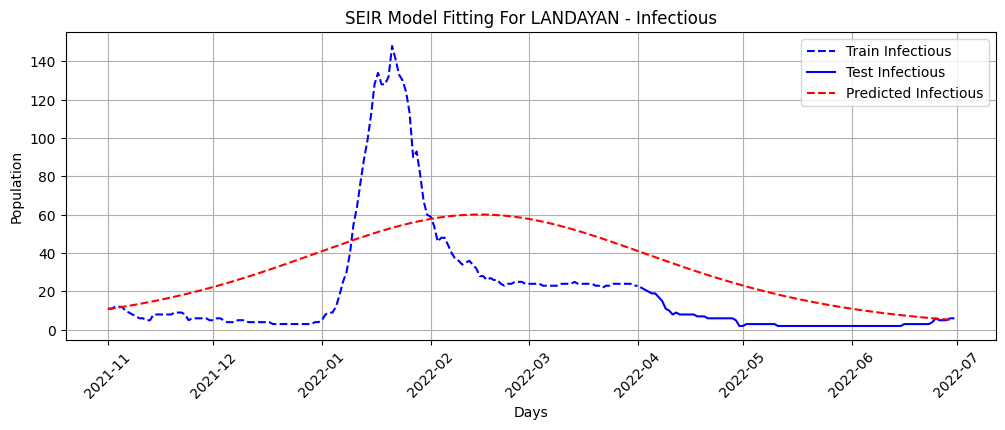

beta: 0.902910233629063 
sigma: 0.6419416830814658 
gamma: 0.8205264027899847 
mae: 15.609832897681605 
rmse: 22.016701667599506


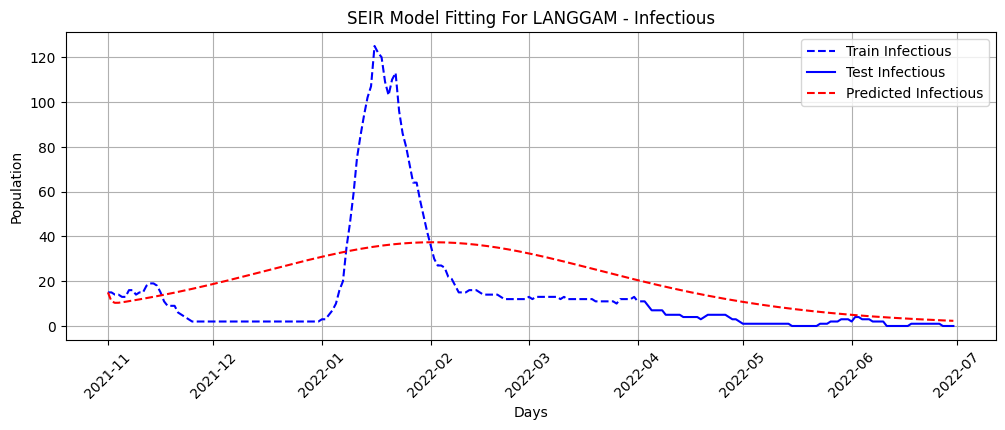

beta: 0.6602461987028214 
sigma: 0.5428593382147602 
gamma: 0.6089613832013534 
mae: 3.179302114483383 
rmse: 4.521609773509098


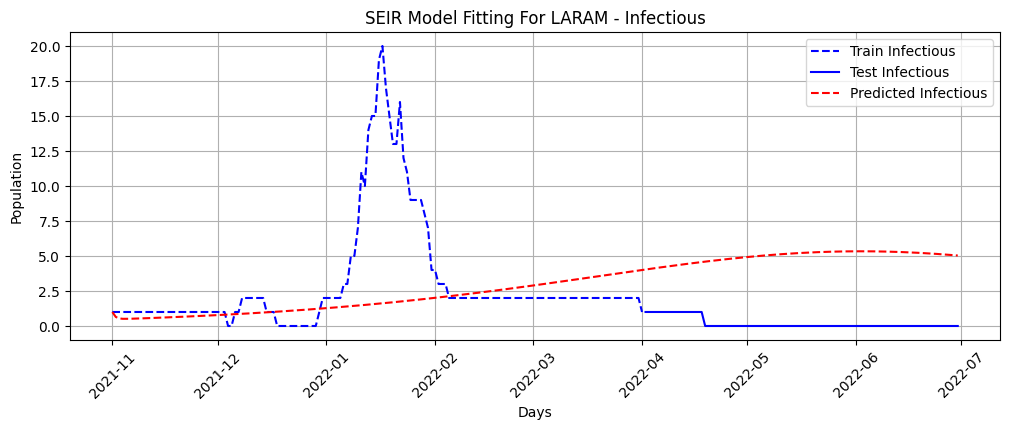

beta: 0.990249956223593 
sigma: 0.9559439451173833 
gamma: 0.9090989836238405 
mae: 5.346014275169094 
rmse: 7.82190979817289


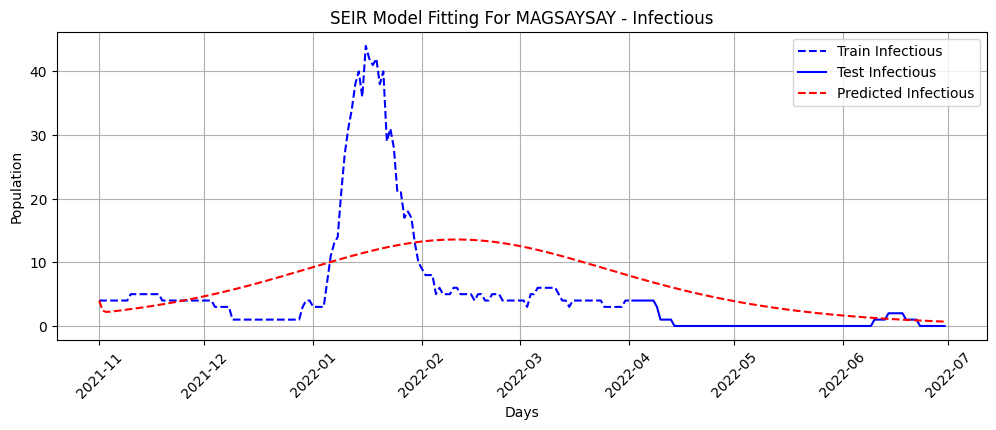

beta: 0.7352831240218836 
sigma: 0.6854555756271861 
gamma: 0.6254497818051556 
mae: 4.845118734736479 
rmse: 7.648505217334687


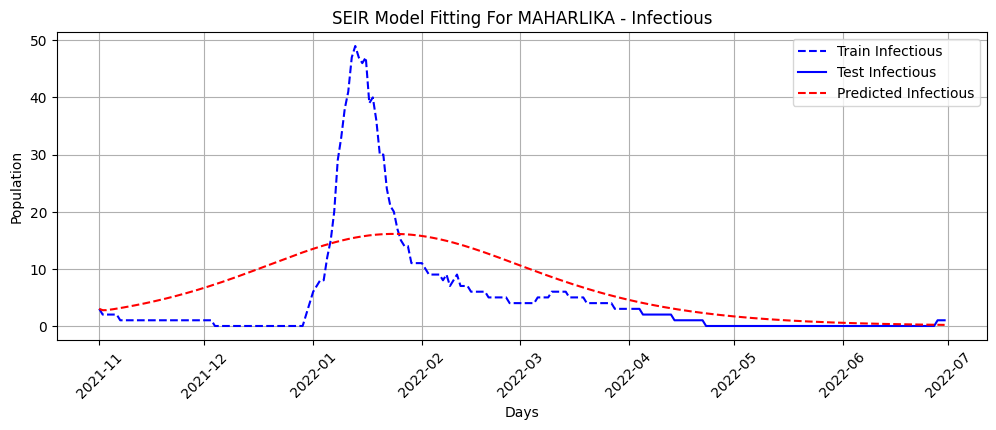

beta: 0.0 
sigma: 0.614595556385436 
gamma: 0.0 
mae: 1.140495867768595 
rmse: 1.468681311036683


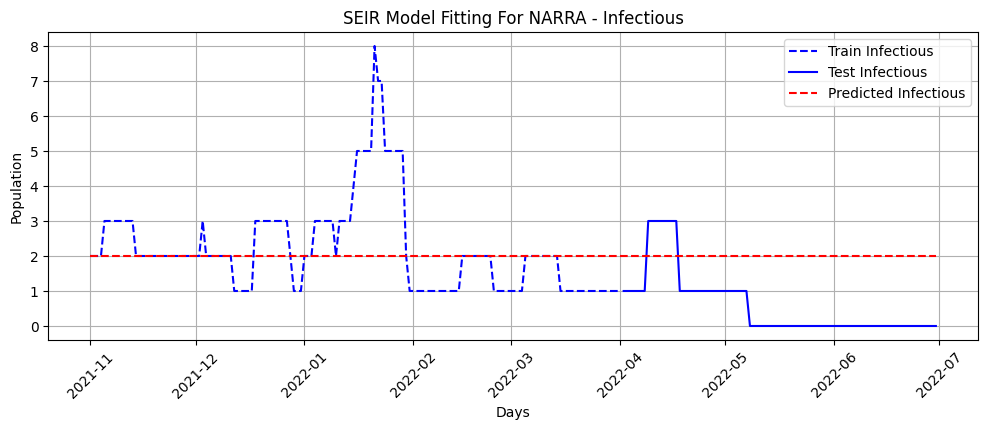

beta: 1.0 
sigma: 0.4874353505183774 
gamma: 0.8407512028825249 
mae: 3.075214300758195 
rmse: 5.544851224751291


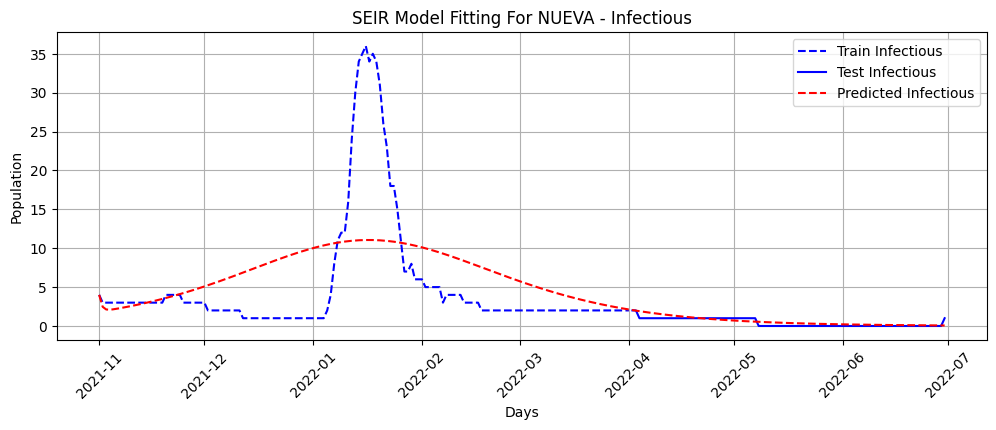

beta: 1.0 
sigma: 0.44671674045402093 
gamma: 0.8321412209280483 
mae: 16.002050093860458 
rmse: 26.485916792280634


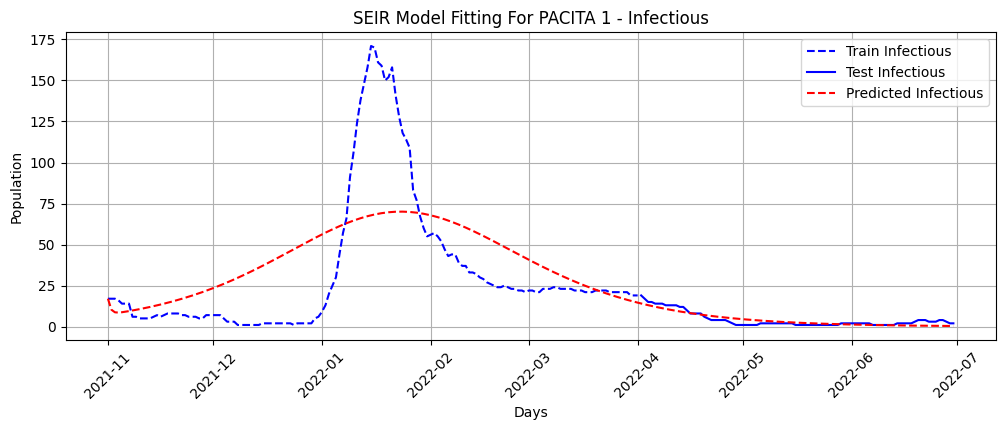

beta: 1.0 
sigma: 0.3393369992166253 
gamma: 0.8168543496557894 
mae: 8.583852781380402 
rmse: 13.648321180117488


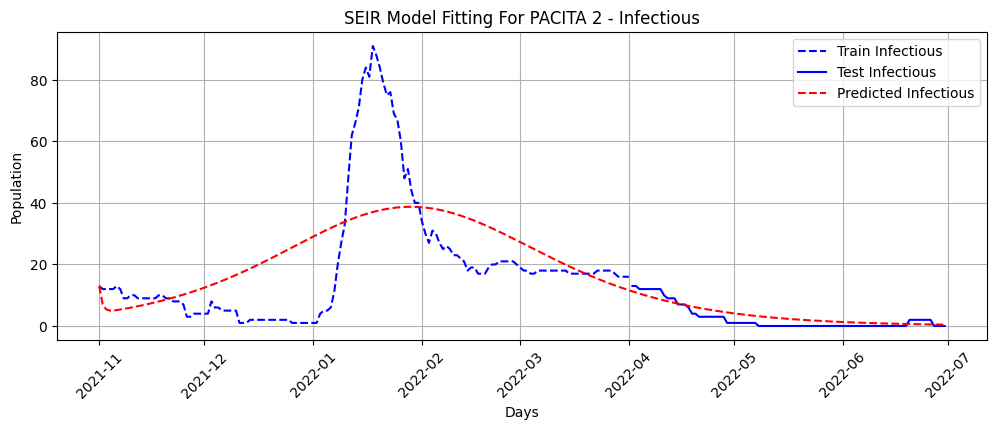

beta: 0.745431926269737 
sigma: 0.6266064376706686 
gamma: 0.6450277431207254 
mae: 3.4219891828979625 
rmse: 5.1812359232968435


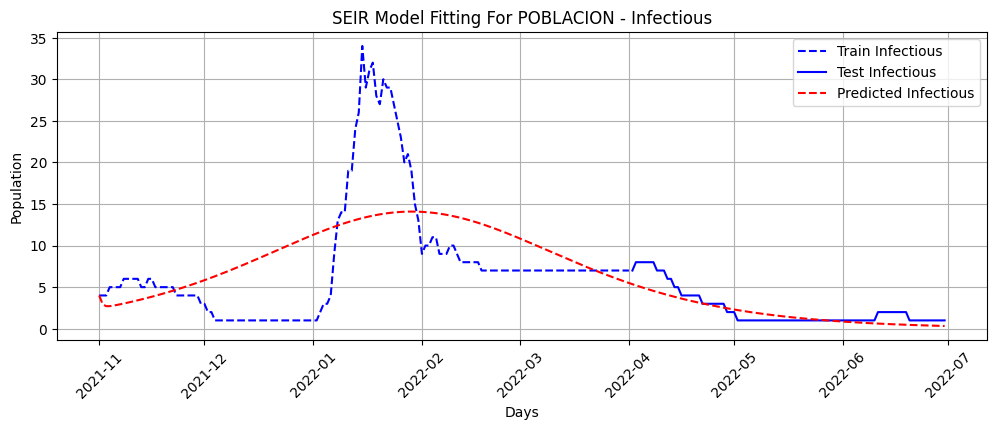

beta: 0.6135202460819578 
sigma: 0.8988652762269748 
gamma: 0.569755026833688 
mae: 1.488466458489889 
rmse: 1.8771539315287176


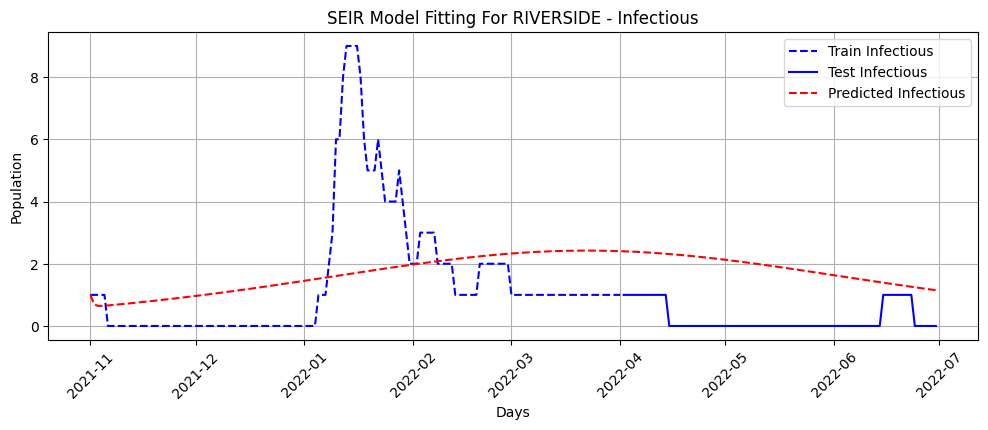

beta: 1.0 
sigma: 0.5862363652066336 
gamma: 0.795879032560881 
mae: 5.783123672046487 
rmse: 9.531234202072678


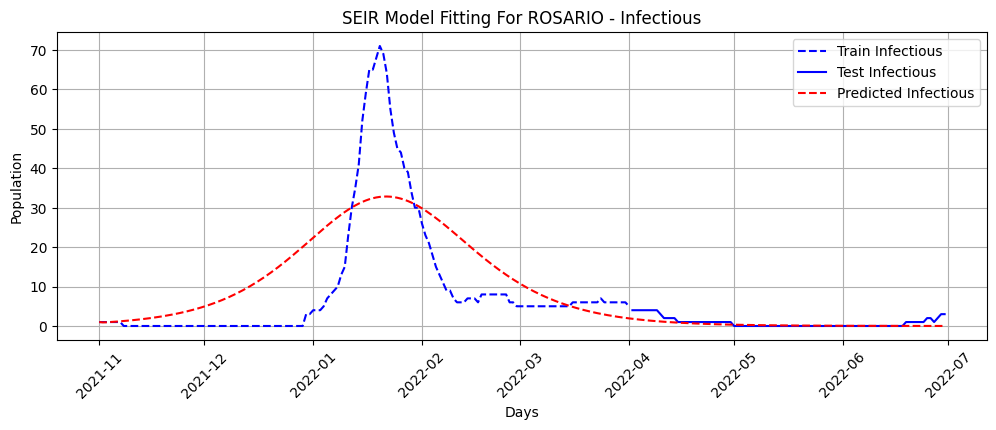

beta: 0.9867995044355671 
sigma: 1.0 
gamma: 0.8168628527122413 
mae: 4.107754072912251 
rmse: 7.423366463720527


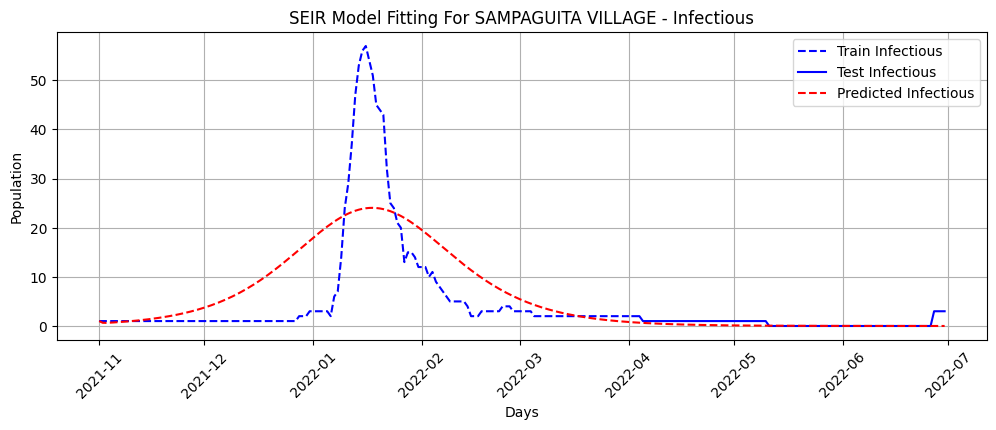

beta: 0.03726717641373506 
sigma: 0.4468153782433318 
gamma: 0.0247027274544271 
mae: 100.3148491219712 
rmse: 135.8594291831268


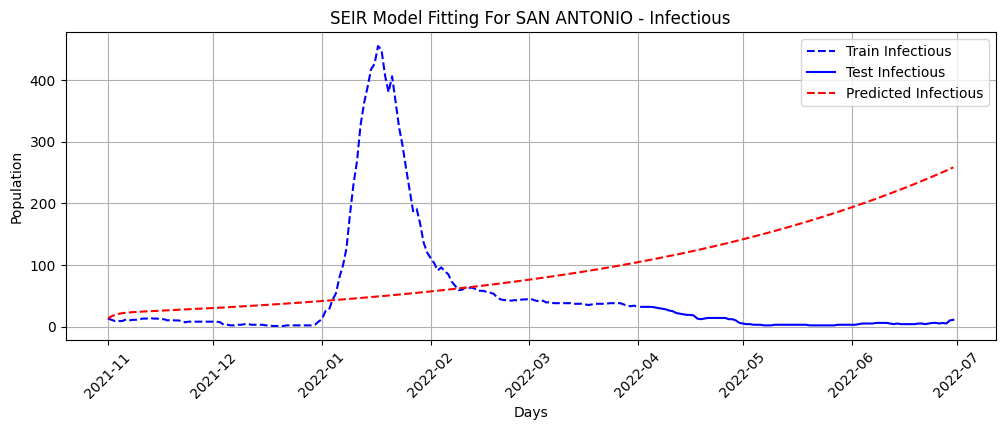

beta: 0.8921719476838653 
sigma: 0.5987037137973839 
gamma: 0.7900943824464867 
mae: 2.9341883899570473 
rmse: 4.5142237959270455


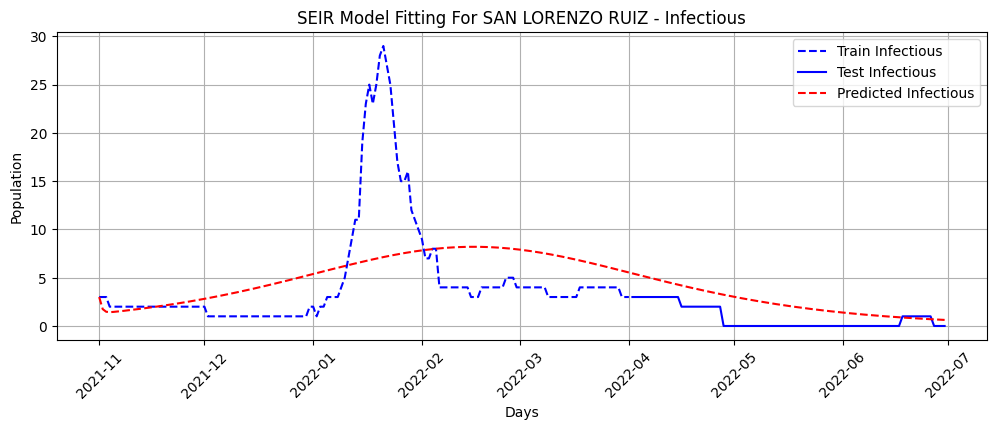

beta: 0.33091235076938363 
sigma: 0.4140656398209177 
gamma: 0.28309190723939864 
mae: 11.545236152700273 
rmse: 16.18061678940324


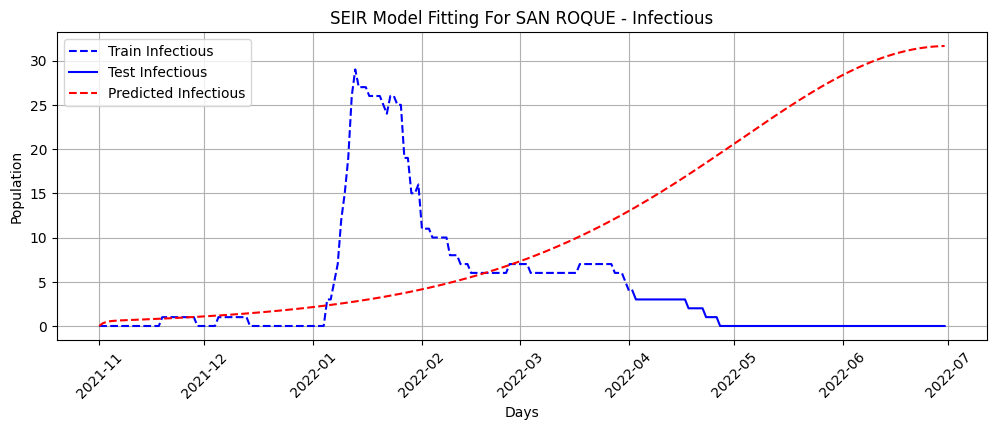

beta: 1.0 
sigma: 0.3550170193197899 
gamma: 0.7620900698633392 
mae: 33.480874038375916 
rmse: 58.05152094332431


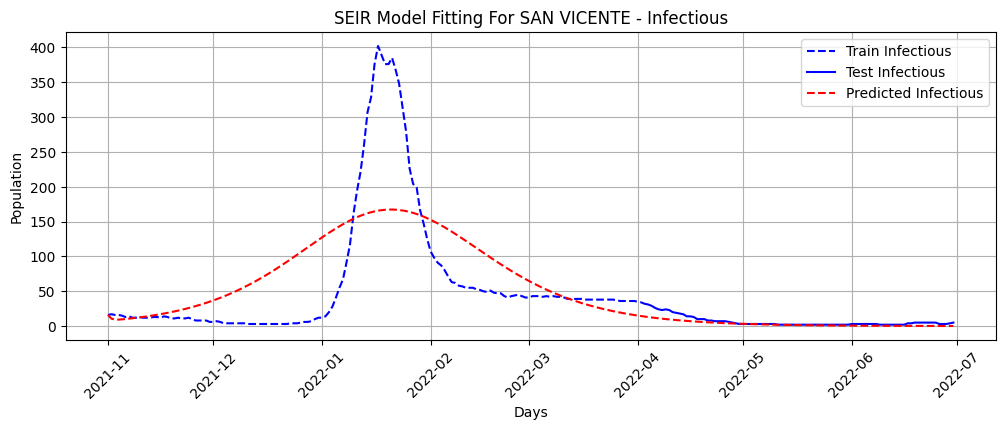

beta: 0.07006166432415697 
sigma: 0.6852418049914699 
gamma: 0.04257548600391477 
mae: 14.024725408576488 
rmse: 22.055755619588854


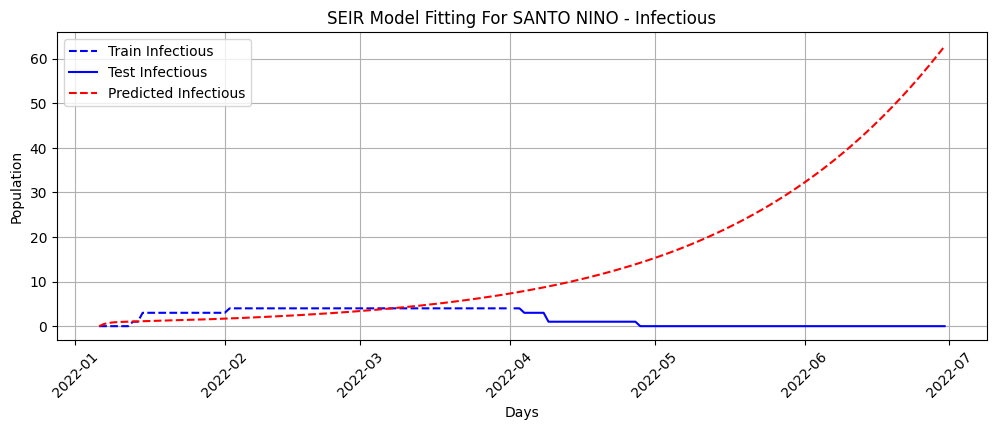

beta: 0.9359124137988069 
sigma: 0.5594702246120308 
gamma: 0.8423080036861282 
mae: 3.028222654833917 
rmse: 4.5704167604266335


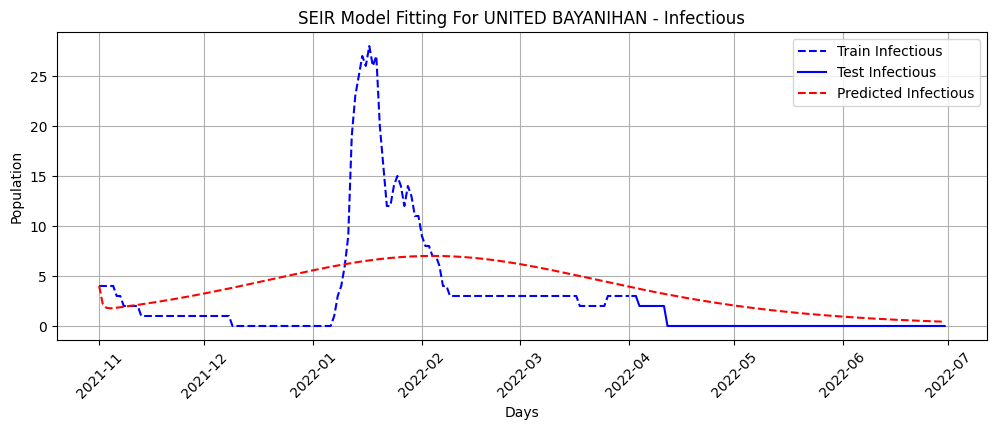

beta: 0.28589929322809216 
sigma: 0.36399660846512405 
gamma: 0.24596516930133425 
mae: 7.705061289924705 
rmse: 10.76480800917486


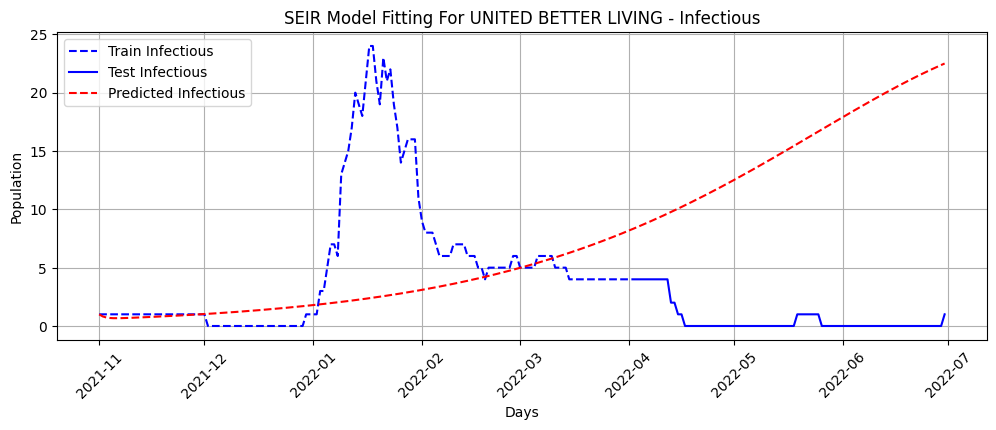

In [54]:
df_observed_data = main_df[(main_df['date'] >= '11/01/2021') & (main_df['date'] <= '06/30/2022')]

for brgy_name, brgy_pop in barangay_population_dict.items():
    brgy_data = df_observed_data[df_observed_data["barangay_Res"] == brgy_name]
    
    if brgy_data.empty:
        print(f"Skipping {brgy_name}: No data available.")
        continue        

    # only for plotting
    brgy_train_data = brgy_data[(brgy_data['date'] >= '11/01/2021') & (brgy_data['date'] <= '04/01/2022')]
    brgy_test_data = brgy_data[(brgy_data['date'] >= '04/02/2022') & (brgy_data['date'] <= '06/30/2022')]

    brgy_data = brgy_data.sort_values(by="date") 
    #brgy_data = brgy_test_data.sort_values(by="date") 
    observed_data = brgy_data[["count_Exposed", "count_Infectious", "count_Recovered"]]
    
    N = brgy_pop
    E0 = observed_data['count_Exposed'].iloc[0] # Initial exposed cases
    I0 = observed_data['count_Infectious'].iloc[0] # Initial infected from data
    R0 = observed_data['count_Recovered'].iloc[0] # Initial recovered
    S0 = N - E0 - I0 - R0  # Susceptible

    initial_conditions: tuple = [S0, E0, I0, R0]
    time_points = np.arange(observed_data.shape[0]) # odeint expects an array (vector) of integers.
    
    try:
        o_beta, o_sigma, o_gamma = params_dict[brgy_name]['beta'], params_dict[brgy_name]['sigma'], params_dict[brgy_name]['gamma'] # from best params
    
    except Exception as e:
        print(f"Error processing {brgy_name}: {e}")
        continue
    
    s, e, i, r = simulate_seir(o_beta, o_sigma, o_gamma, initial_conditions, time_points, N)
    
    # for plotting observed data
    plot_actual = pd.DataFrame({
        'date_train': brgy_train_data['date'],
        'date_test': brgy_test_data['date'],
        'train_infectious': brgy_train_data['count_Infectious'],
        'test_infectious': brgy_test_data['count_Infectious'],
    })
    
    plot_prediction = pd.DataFrame({
    'date': brgy_data['date'],
    'S': s,
    'E': e,
    'I': i,
    'R': r
    })
    
    # Infectious
    mae_infectious = mean_absolute_error(brgy_data['count_Infectious'], i)
    rmse_infectious = np.sqrt(mean_squared_error(brgy_data['count_Infectious'], i))
    print(f"beta: {o_beta} \nsigma: {o_sigma} \ngamma: {o_gamma} \nmae: {mae_infectious} \nrmse: {rmse_infectious}")
    
    plt.figure(figsize=(12, 4))
    plt.plot(plot_actual['date_train'], plot_actual['train_infectious'], 'b--', label='Train Infectious')
    plt.plot(plot_actual['date_test'], plot_actual['test_infectious'], 'b-', label='Test Infectious')
    plt.plot(plot_prediction['date'], plot_prediction['I'], 'r--', label='Predicted Infectious')
    plt.xlabel('Days')
    plt.ylabel('Population')
    plt.legend()
    plt.xticks(rotation=45)
    plt.title(f'SEIR Model Fitting For {brgy_name} - Infectious')
    plt.grid(True)
    plt.show()